<a href="https://colab.research.google.com/github/240609/MLF/blob/main/FeedforwardNN_Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

path_to_dataset = 'sample_data/voting_complete.csv' # change the PATH
#path_to_dataset = '/content/drive/MyDrive/MLF/voting_complete.csv'
pd_dataset = pd.read_csv(path_to_dataset)

#print(pd_dataset)

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True)
x_train

x = pd.get_dummies(x_train)
x


,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
2,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,True,False,False,True
3,False,True,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
4,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,True,False,True,False,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
344,True,False,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
345,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
346,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True


In [22]:
y = y_train.replace({'democrat': 0, 'republican': 1})
y




<ipython-input-22-009559f30190>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y_train.replace({'democrat': 0, 'republican': 1})


,Class Name
0,1
1,0
2,0
3,0
4,0
...,...
343,1
344,0
345,1
346,1


In [27]:
model = Sequential()
model.add(Dense(8, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])



In [33]:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

history = model.fit(x_train, y_train, epochs=100, batch_size=4, verbose = 0, validation_data=(x_val, y_val))


Accuracy: 98.85


In [40]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)
x_test

x_te = pd.get_dummies(x_test)
x_te
y_te = y_test.replace({'democrat': 0, 'republican': 1})
y_te

loss, accuracy = model.evaluate(x, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))



Accuracy: 98.85
Loss: 1.94


<ipython-input-40-a0161aadf274>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_te = y_test.replace({'democrat': 0, 'republican': 1})


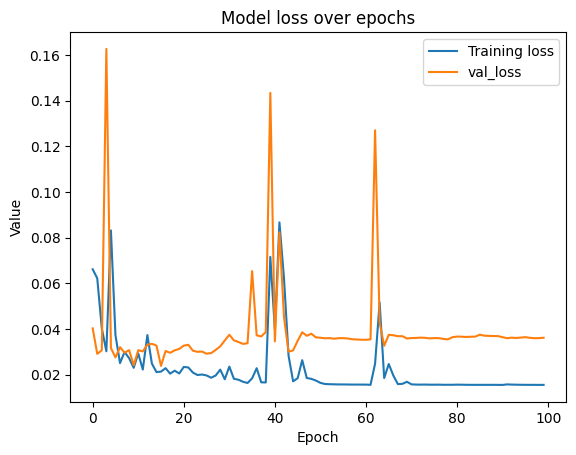

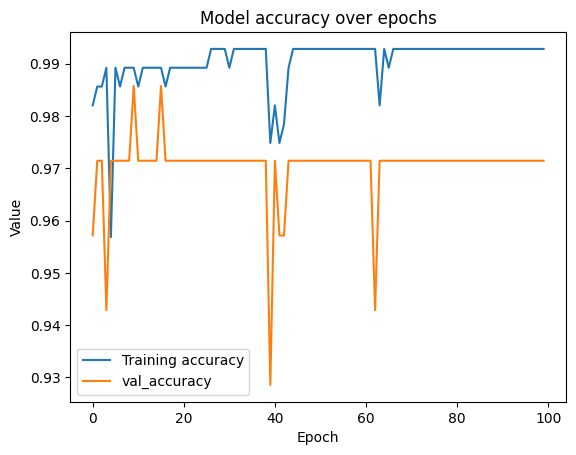

In [42]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('Model loss over epochs')
ax.legend()
plt.show()

fig, ay = plt.subplots()
ay.plot(history.history['accuracy'], label='Training accuracy')
ay.plot(history.history['val_accuracy'], label='val_accuracy')
ay.set_xlabel('Epoch')
ay.set_ylabel('Value')
ay.set_title('Model accuracy over epochs')
ay.legend()
plt.show()


#plt.figure()
#plt.plot(history.history['loss'])
#plt.xlabel('n epochs')
#plt.ylabel('loss')


#plt.figure()
#plt.plot(history.history['accuracy'])
#plt.xlabel('n epochs')
#plt.ylabel('accuracy')
